In [1]:
# ====================================================================
# PROJETO: SEGMENTAÇÃO DE PERFIS DE CLIENTES DE CRÉDITO
# ETAPA 1: CARREGAMENTO E LIMPEZA DOS DADOS
# ====================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carregamento e limpeza inicial dos dados 
try:
    file_path = '../data/german_credit_data.csv' 
    df = pd.read_csv(file_path)
    
    # Remover a coluna 'Unnamed: 0'
    if 'Unnamed: 0' in df.columns:
        df = df.drop('Unnamed: 0', axis=1)
        print("Coluna 'Unnamed: 0' removida.")

    # Renomear as 9 colunas restantes para o padrão Python
    df.columns = [
        'age', 'sex', 'job', 'housing', 'saving_accounts', 
        'checking_account', 'credit_amount', 'duration', 'purpose'
    ]
    
except FileNotFoundError:
    print(f"\n--- ERRO ---")
    print(f"Arquivo não encontrado em '{file_path}'")
    print("Verifique se o arquivo 'german_credit_data.csv' está na pasta 'data'.")

df.head()


Coluna 'Unnamed: 0' removida.


,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [4]:
# ====================================================================
# ETAPA 2: PRÉ-PROCESSAMENTO E MAPEAMENTO DE VARIÁVEIS
# ====================================================================

# Dicionário para mapear os códigos da coluna 'job' para seus significados
job_map = {
    0: 'Desempregado/Não Qualificado',
    1: 'Não Qualificado (Residente)',
    2: 'Qualificado/Servidor Público',
    3: 'Gerente/Autônomo/Alta Qualificação'
}

# Criar uma nova coluna 'job_description' usando o mapa
df['job_description'] = df['job'].map(job_map)
df[['job', 'job_description']].head()

,job,job_description
0,2,Qualificado/Servidor Público
1,2,Qualificado/Servidor Público
2,1,Não Qualificado (Residente)
3,2,Qualificado/Servidor Público
4,2,Qualificado/Servidor Público


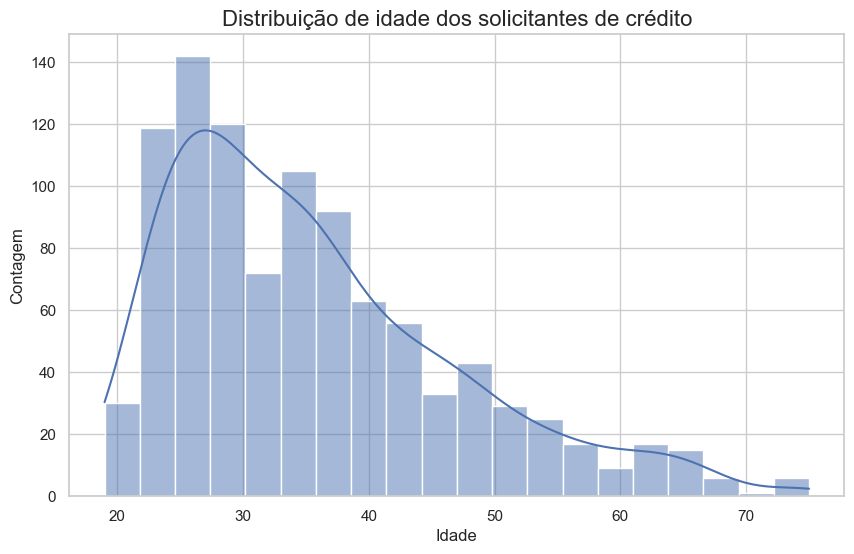

In [6]:
# ====================================================================
# ETAPA 3: ANÁLISE EXPLORATÓRIA DE DADOS (EDA)
# 3.1 - Distribuição de idade dos solicitantes
# ====================================================================

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', bins=20, kde=True)
plt.title('Distribuição de idade dos solicitantes de crédito', fontsize=16)
plt.xlabel('Idade', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
plt.show()


/var/folders/zb/n4b0x_7x4f3gss2mckv3d6jw0000gn/T/ipykernel_11571/263047724.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='purpose', order=df['purpose'].value_counts().index, palette='viridis')


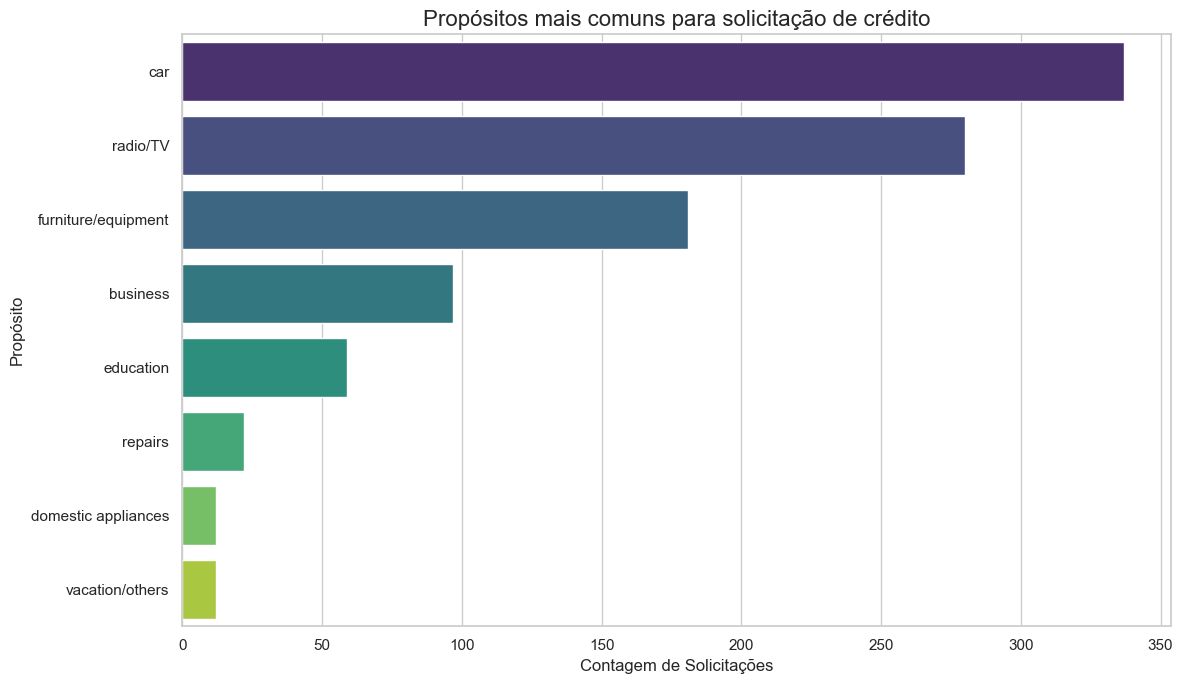

In [7]:
# 3.2 - Propósitos Mais Comuns para Solicitação de Crédito

plt.figure(figsize=(12, 7))
sns.countplot(data=df, y='purpose', order=df['purpose'].value_counts().index, palette='viridis')
plt.title('Propósitos mais comuns para solicitação de crédito', fontsize=16)
plt.xlabel('Contagem de Solicitações', fontsize=12)
plt.ylabel('Propósito', fontsize=12)
plt.tight_layout()
plt.show()

/var/folders/zb/n4b0x_7x4f3gss2mckv3d6jw0000gn/T/ipykernel_11571/1330054652.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='credit_amount', y='job_description', palette='magma')


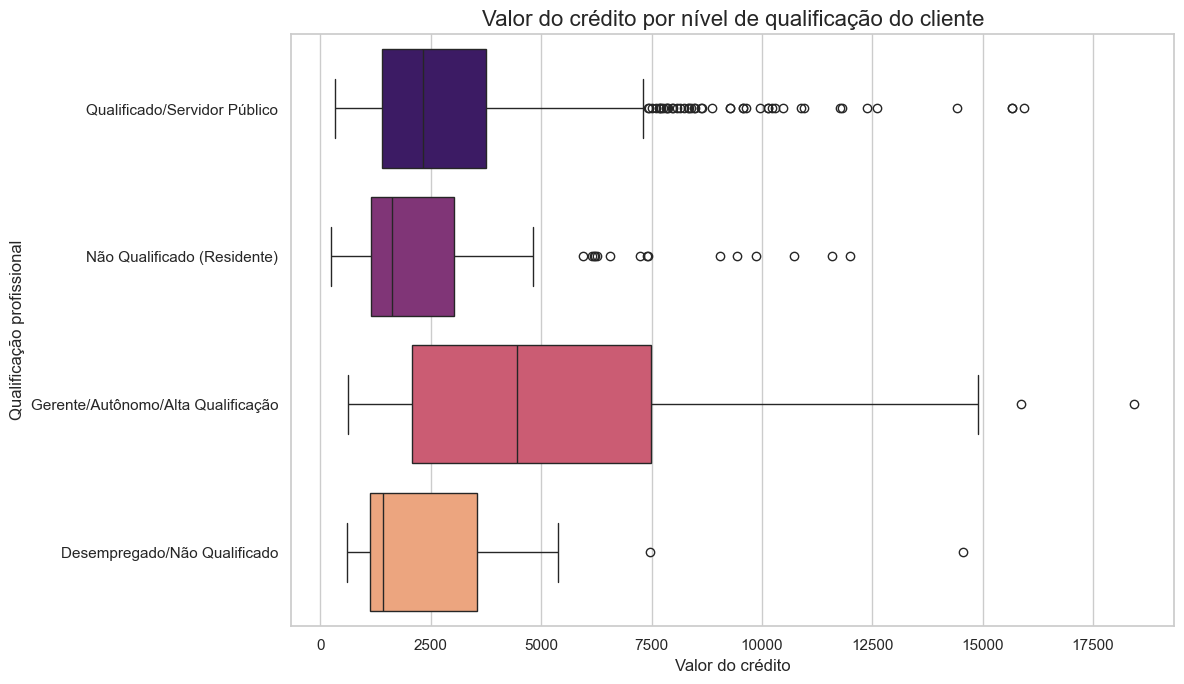

In [8]:
# 3.3 - Relação entre valor do crédito e qualificação profissional

plt.figure(figsize=(12, 7))
sns.boxplot(data=df, x='credit_amount', y='job_description', palette='magma')
plt.title('Valor do crédito por nível de qualificação do cliente', fontsize=16)
plt.xlabel('Valor do crédito', fontsize=12)
plt.ylabel('Qualificação profissional', fontsize=12)
plt.tight_layout()
plt.show()